In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from matplotlib.pyplot import cm
import matplotlib.image as mpimg
from astropy.visualization import time_support
from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
import datetime
from collections import OrderedDict
from pandas import DataFrame
import astropy.units as u
from astropy.time import Time, TimeDelta
import sunpy.data.sample
import sunpy.timeseries
from sunpy.net import Fido
from sunpy.time import TimeRange, parse_time
from sunpy.util.metadata import MetaDict

'''
RHESSI BROWSER GUIDE:

-Go to  http://sprg.ssl.berkeley.edu/~tohban/browser/

-Select the day and time of the event you're interested in

-Check:
    GOES w/ RHESSI Times 
    RHESSI by Time 
    RHESSI by Flare 

-After selecting the flare of interest, click on 'Image Archive: for this flare' 
 to get info on the flare HXR peaktime, position etc.
'''


'''
NASA CDA WEB GUIDE:

-Go to  https://cdaweb.gsfc.nasa.gov/index.html  

-Tick the boxes next to the instruments you want to use (Wind, in this case) and submit 

-Uncheck all boxes by clicking on 'Click here to CLEAR All checkboxes' and only select 
 the data you're intereseted in, in this case:

 WI_ELSP_3DP
 WI_EHSP_3DP
 WI_SFSP_3DP
 WI_H1_WAV

 and submit

-Select

 WI_ELSP_3DP: ---> As stacked plot
 WI_EHSP_3DP: ---> As stacked plot
 WI_SFSP_3DP: ---> As stacked plot
 WI_H1_WAV: Normalized receiver average voltage (RAD2, 1075-13825 kHz)
            Normalized receiver average voltage (RAD1, 20-1040 kHz)
            Normalized receiver average voltage (TNR, 4-245 kHz)

Select the time range of interest and submit to plot the data to make sure that it's what you're looking for

Instead of plotting, to download data as csv files:

-Tick 'List Data (ASCII/CSV):'
    -Tick 'CSV options'
         -Tick 'Data and global attribute info in CSV'


In your JupyterHub working directory create a folder; you can call it whatever you want, but in this
example its called 'Langmuir waves analysis'.
Inside this folder, for each event you analyse create a new folder named after 
the date of the event you're analysing (dd-mm-yyyy), e.g. 25-04-2002

For each event, move the files you downloaded

WI_H1_WAV_filenumber.csv
WI_EHSP_3DP_filenumber.csv
WI_ELSP_3DP_filenumber.csv
WI_SFSP_3DP_filenumber.csv

into their respective folder

'''


'''
IMPORTANT!

Open your 'WI_H1_WAV_filenumber.csv' and change the column name 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'
to 'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'

Not sure why, but it won't plot otherwise
'''

'''
Final steps:

-Change the fields below to match the event you're analyzing
-Run all cells and pray
'''


#---------------------------------------------

# Insert name of the folder you created
folder_name = 'Langmuir waves analysis'

# Insert the file number you're working with, e.g. WI_EHSP_3DP_filenumber.csv
file_no = str(23030)

# Insert time range and time of event
dd, dd_init, dd_end = '25', '25', '25'  # day of event, day at start of time range, day at end of time range
                                        # useful in case the time range you're working with starts on one day 
                                        # and ends on the next 
mm = '04' # month
yyyy = '2002' #year
HH, MM, SS = 5, 56, 34  # peak time of HXR event
t_start = '05:00' # start of time range
t_end = '09:00' # end of time range

# Choose GOES instrument
goes_num = 10 # select goes instrument, since different instruments were available in different time periods

# Choose appropriate WIND 3DP energy channels in case some of the data is missing or corrupted
# (you can check that on NASA CDA web)
channels_1 = 7 # bottom channels
channels_2 = 15 # top channels
channels_3 = 15 # middle channels

#---------------------------------------------

event_start_time = dt.datetime(int(yyyy),int(mm),int(dd),HH, MM, SS) # peak time of the event yyyy,m,d,H,M,S
date_for_path = dd + '-' + mm + '-' + yyyy

tstart = yyyy + '-' + mm + '-' + dd_init + ' ' + t_start
tend = yyyy + '-' + mm + '-' + dd_end + ' ' + t_end

f2_header = 46 # 6 eV to 1113 eV 
f3_header = 51 # 200 eV to 27 keV 
f1_header = 72 # 27 keV up 
spec_header = 43

path = folder_name + '/' + date_for_path + '/'
spec_name = 'WI_H1_WAV_' + file_no + '.csv'
f2_name = 'WI_ELSP_3DP_' + file_no + '.csv' # ELSP
f3_name = 'WI_EHSP_3DP_' + file_no + '.csv' # EHSP
f1_name = 'WI_SFSP_3DP_' + file_no + '.csv' # SFSP

#rhessi_date = '_20140418'
#rhessi_timeinterval = '_120000_160000'
#rhessi_filepath = 'Langmuir waves analysis/' + date_for_path + '/' + 'goes_rhessi' + rhessi_date + rhessi_timeinterval + '.eps'

init_channels_1 = 0
init_channels_2 = 0
init_channels_3 = 0

def arrival_time(E):
    m = 9.1e-31
    v = np.sqrt(3.2e-16 * E/m)
    dist = 215*7e8
    t = dist/v
    return event_start_time + dt.timedelta(0,t) 


C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

2 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2002-04-25 00:00:00.000 2002-04-25 23:59:59.999        XRS ...   GOES     NOAA
2002-04-25 00:00:00.000 2002-04-25 23:59:59.999        XRS ...   GOES     NOAA




In [3]:
result_goes = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(goes_num))
print(result_goes)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2002-04-25 00:00:00.000 2002-04-25 23:59:59.999        XRS ...   GOES     NOAA




In [4]:
file_goes = Fido.fetch(result_goes)

Files Downloaded: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.12s/file]


In [5]:
results_RHESSI = Fido.search(a.Time(tstart, tend),
                      a.Instrument.rhessi, a.Physobs.summary_lightcurve)  
RHESSI = Fido.fetch(results_RHESSI)

Files Downloaded: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.12file/s]


C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


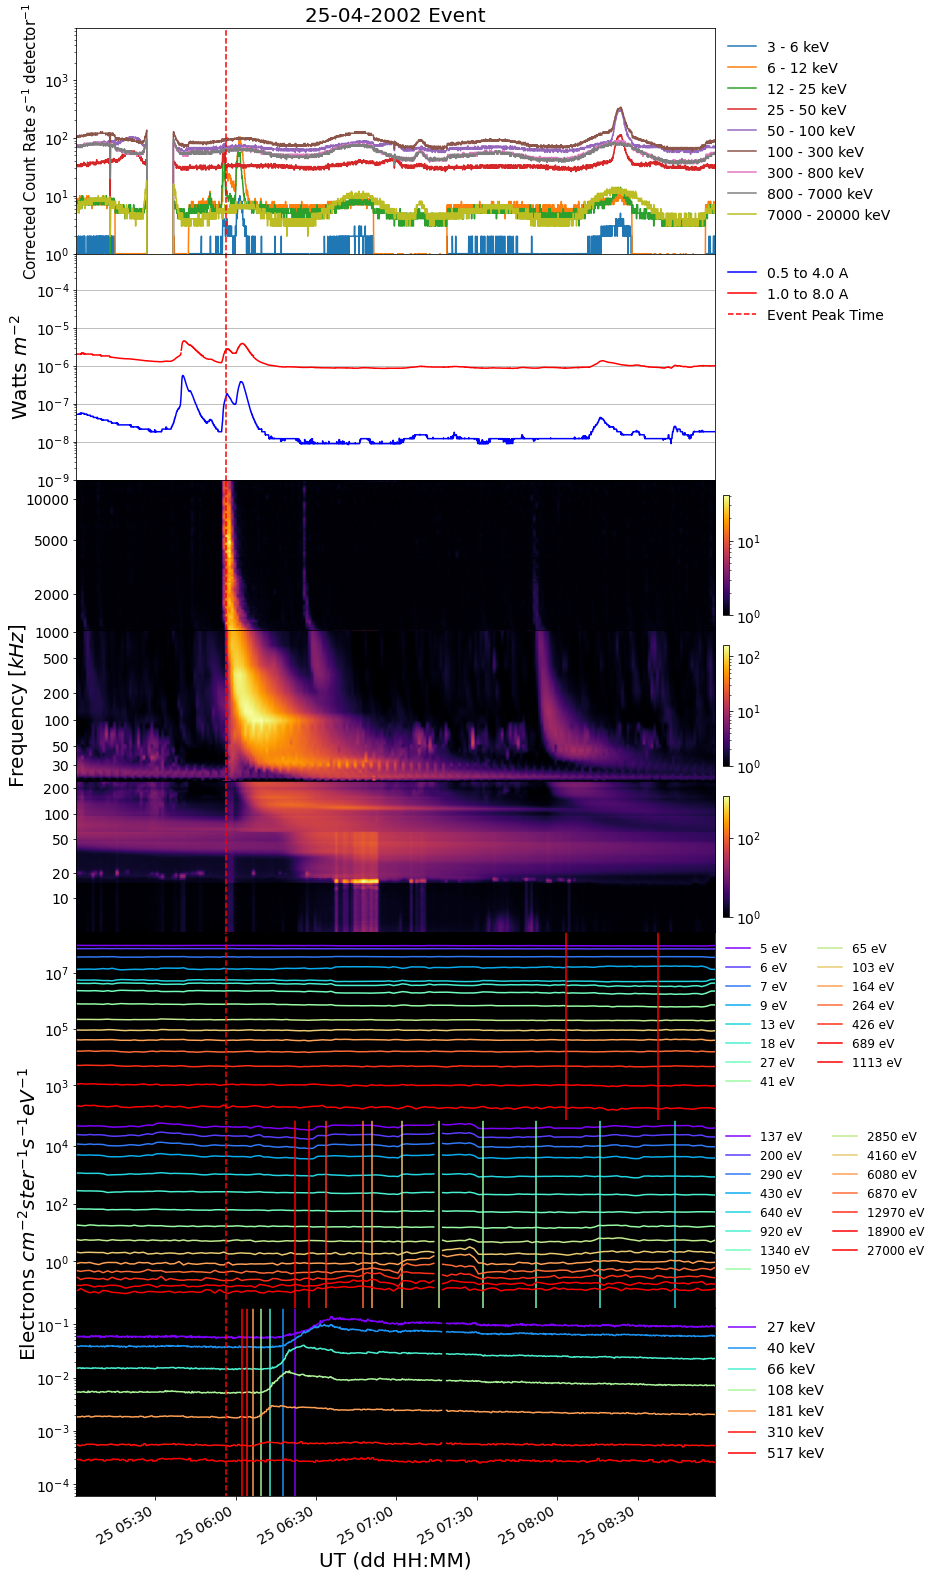

In [6]:

df_spec = pd.read_csv(path + spec_name, header=spec_header, skipfooter=3)
df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

dates_list = df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'].to_list()
x_lims_ = [dates_list[0], dates_list[-1]]
#x_lims = list(map(dt.datetime.fromtimestamp, x_lims_))
x_lims = mdates.date2num(x_lims_)

y_lims0 = np.linspace(1075, 13825, 100)
y_lims1 = np.linspace(20, 1040, 100)
y_lims2 = np.linspace(4, 245, 100)

ratios0=[1,0]
ratios1=[1,0.19099]
ratios_goes = [1,0.191]
ratios_rhessi = [1,0.191]
col_posit = 0.01
shrink_c = 0.8

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return round(10**x) #r'$10^{%.2f}$' % (x)

df_spec = df_spec.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ')
df_spec = df_spec[df_spec.columns[::-1]].T

df_spec0 = df_spec.iloc[353:-1, :]
df_spec1 = df_spec.iloc[95:353, :]
df_spec2 = df_spec.iloc[0:95, :]

date_format = mdates.DateFormatter('%H:%M:%S')
locator = mdates.HourLocator([4, 5, 6, 7, 8, 9])

plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)


fig = plt.figure(figsize=(15,30))
ax = fig.add_gridspec(4, 1, hspace=0, height_ratios=[0.4,0.4,0.8,1])

ax_rhessi = ax[0].subgridspec(1, 2, hspace=0, width_ratios=ratios_rhessi)
ax_goes = ax[1].subgridspec(1, 2, hspace=0, width_ratios=ratios_goes)
ax_0 = ax[2].subgridspec(3, 2, hspace=0, width_ratios=ratios0)
ax_1 = ax[3].subgridspec(3, 2, hspace=0, width_ratios=ratios1)

axrhessi = fig.add_subplot(ax_rhessi[0, 0])
axrhessi_fake = fig.add_subplot(ax_rhessi[0, 1])

axgoes = fig.add_subplot(ax_goes[0, 0])
axgoes_fake = fig.add_subplot(ax_goes[0, 1])

ax0 = [fig.add_subplot(ax_0[0, 0]), fig.add_subplot(ax_0[1, 0]), fig.add_subplot(ax_0[2, 0])]
ax0_fake = [fig.add_subplot(ax_0[0, 1]), fig.add_subplot(ax_0[1, 1]), fig.add_subplot(ax_0[2, 1])]


ax1 = [fig.add_subplot(ax_1[0, 0]), fig.add_subplot(ax_1[1, 0]), fig.add_subplot(ax_1[2, 0])]
ax1_fake = [fig.add_subplot(ax_1[0, 1]), fig.add_subplot(ax_1[1, 1]), fig.add_subplot(ax_1[2, 1])]


flare_time = mdates.date2num(event_start_time)

ts_rhessi = sunpy.timeseries.TimeSeries(RHESSI.data[0], source='RHESSI')
RHESSI_data = ts_rhessi.to_dataframe()

n_cols = RHESSI_data.shape[1] 
step = 1

RHESSI_time = mdates.date2num(RHESSI_data.index)
RHESSI_time = RHESSI_time[::step]
k = 0

while k < n_cols:
    data_to_plot = RHESSI_data.iloc[::step,k].tolist()
    axrhessi.plot(RHESSI_time, data_to_plot, label = RHESSI_data.columns[k]) 
    k += 1

RHESSI_len = len(RHESSI.data)

if RHESSI_len > 1:
    iterel = 1
    while iterel < RHESSI_len:
        ts_rhessi = sunpy.timeseries.TimeSeries(RHESSI.data[iterel], source='RHESSI')
        RHESSI_data = ts_rhessi.to_dataframe()

        n_cols = RHESSI_data.shape[1] 

        RHESSI_time = mdates.date2num(RHESSI_data.index)
        RHESSI_time = RHESSI_time[::step]
        k = 0

        while k < n_cols:
            data_to_plot = RHESSI_data.iloc[::step,k].tolist()
            axrhessi.plot(RHESSI_time, data_to_plot) 
            k += 1
        iterel += 1
    
    

goes_ = ts.TimeSeries(file_goes[0])

goes_a = goes_.data['xrsa'].tolist()
goes_b = goes_.data['xrsb'].tolist()
goes_time = mdates.date2num(goes_.data.index)

axgoes.plot(goes_time, goes_a, 'b', label='0.5 to 4.0 A')
axgoes.plot(goes_time, goes_b, 'r', label='1.0 to 8.0 A')

n = len(file_goes)
if n > 1:
    iterat = 1
    while iterat < n:
        goes_ = ts.TimeSeries(file_goes[iterat])
        goes_a = goes_.data['xrsa'].tolist()
        goes_b = goes_.data['xrsb'].tolist()
        goes_time = mdates.date2num(goes_.data.index)
        axgoes.plot(goes_time, goes_a, 'b')
        axgoes.plot(goes_time, goes_b, 'r')
        iterat += 1


for a in ax1:
    a.set_anchor('W')

for a in ax1:
    a.patch.set_facecolor('black')

for a in ax0:
    a.patch.set_facecolor('black')

df_spec0 = df_spec0.clip(lower=1)
im = ax0[0].imshow(df_spec0, norm=colors.LogNorm(), cmap=cm.inferno,
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims0[0]), np.log10(y_lims0[-1])], aspect='auto')
fig.colorbar(im, ax=ax0[0], pad=col_posit, shrink=shrink_c)

ax0[0].xaxis.set(major_formatter=date_format)
ax0[0].tick_params(bottom = False)
ax0[0].set_xticks([])
ax0[0].yaxis.set_major_formatter(fake_log)
ax0[0].yaxis.set_major_locator(MaxNLocator(5)) 
ax0[0].set_yticks(np.log10(np.array([2000, 5000, 10000])))


#df_spec1*=10 # multiplies every element by 10
df_spec1 = df_spec1.clip(lower=1)
im = ax0[1].imshow(df_spec1, norm=colors.LogNorm(), cmap=cm.inferno,
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims1[0]), np.log10(y_lims1[-1])], aspect='auto')
fig.colorbar(im, ax=ax0[1], pad=col_posit, shrink=shrink_c)

ax0[1].xaxis.set(major_formatter=date_format)
ax0[1].tick_params(bottom = False)
ax0[1].set_xticks([])
ax0[1].yaxis.set_major_formatter(fake_log)
ax0[1].yaxis.set_major_locator(MaxNLocator(5)) 
ax0[1].set_yticks(np.log10(np.array([30, 50, 100, 200, 500, 1000])))

df_spec2 = df_spec2.clip(lower=1)
im = ax0[2].imshow(df_spec2, norm=colors.LogNorm(), cmap=cm.inferno, 
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims2[0]), np.log10(y_lims2[-1])], aspect='auto')
fig.colorbar(im, ax=ax0[2], pad=col_posit, shrink=shrink_c)

ax0[2].xaxis.set(major_formatter=date_format)
ax0[2].tick_params(bottom = False)
ax0[2].set_xticks([])
ax0[2].yaxis.set_major_formatter(fake_log)
ax0[2].yaxis.set_major_locator(MaxNLocator(5)) 
ax0[2].set_yticks(np.log10(np.array([10, 20, 50, 100, 200])))

#second set of images

df1 = pd.read_csv(path + f1_name, header=f1_header, skipfooter=3)
df1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

df2 = pd.read_csv(path + f2_name, header=f2_header, skipfooter=3)
df2['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

df3 = pd.read_csv(path + f3_name, header=f3_header, skipfooter=3)
df3['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df3['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')


i1, i2, i3 = init_channels_1 , init_channels_2, init_channels_3
energies1 = [27, 40, 66, 108, 181, 310, 517]
energies2 = list(np.array([5, 6, 7, 9, 13, 18, 27, 41, 65, 103, 164, 264, 426, 689, 1113])*1e-3)
energies3 = [0.137, 0.2, 0.29, 0.43, 0.64, 0.92, 1.34, 1.95, 2.85, 4.16, 6.08, 6.87, 12.97, 18.9, 27]


while i1<= channels_1 - 1 :
    ax1[2].plot(df1.iloc[:, 0], df1.iloc[:, i1+1], c=cm.rainbow([50*i1]))
    ax1[2].vlines(arrival_time(energies1[i1]), 0,0.3, color=cm.rainbow([50*i1]), label = str(energies1[i1]) + ' keV')
    ax1[2].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax1[2].set_yscale("log")
    plt.gcf().autofmt_xdate()
    i1 += 1

while i2 < channels_2 :
    init_indx2 = 1 + init_channels_2
    df2_channels = df2.iloc[:, init_indx2:16]
    df2_reversed = df2_channels[df2_channels.columns[::-1]]
    ax1[0].plot(df2.iloc[:, 0], df2_reversed.iloc[:, i2], c=cm.rainbow([20*i2]), label = str(round(energies2[i2]*1e3)) + ' eV')
    ax1[0].vlines(arrival_time(energies2[i2]), 0,4e8, color=cm.rainbow([20*i2]))
    ax1[0].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax1[0].set_yscale("log")
    i2 += 1

while i3 < channels_3 :
    init_indx3 = 1 + init_channels_3
    df3_channels = df3.iloc[:, init_indx3:16]
    df3_reversed = df3_channels[df3_channels.columns[::-1]]
    ax1[1].plot(df3.iloc[:, 0], df3_reversed.iloc[:, i3], c=cm.rainbow([20*i3]), label = str(round(energies3[i3]*1e3)) + ' eV')
    ax1[1].vlines(arrival_time(energies3[i3]), 0,1e5, color=cm.rainbow([20*i3]))
    ax1[1].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax1[1].set_yscale("log")
    i3 += 1


ax0[0].vlines(flare_time, np.log10(y_lims0[0]), np.log10(y_lims0[-1]), 'r', linestyle='--')
ax0[1].vlines(flare_time, np.log10(y_lims1[0]), np.log10(y_lims1[-1]), 'r', linestyle='--')
ax0[2].vlines(flare_time, np.log10(y_lims2[0]), np.log10(y_lims2[-1]), 'r', linestyle='--')

ax1[0].vlines(flare_time, -1, 1e9, 'r', linestyle='--')
ax1[1].vlines(flare_time, -1, 1e9, 'r', linestyle='--')
ax1[2].vlines(flare_time, -1, 1e9, 'r', linestyle='--')

ax1[1].set_ylim(None, 8e4)
ax1[0].set_ylim(top=3e8)
ax1[2].set_ylim(top=0.2)

ax0[0].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax0[1].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax0[2].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])

ax1[0].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax1[1].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax1[2].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])

ax1[0].set_xticks([])
ax1[1].set_xticks([])
ax1[0].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 12, frameon=False, ncol=2)
ax1[1].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 12, frameon=False, ncol=2)
ax1[2].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 14, frameon=False)
ax1[2].set_xlabel('UT (dd HH:MM)', fontsize = 20)
ax0[1].set_ylabel('Frequency $[kHz]$', fontsize = 20)
ax1[1].set_ylabel('Electrons $cm^{-2} ster^{-1} s^{-1} eV^{-1}$', fontsize = 20)

axgoes.set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
axgoes.vlines(flare_time, -1, 1, 'r', linestyle='--', label = 'Event Peak Time')
axgoes.set_ylim(1e-9, 0.0009)
axgoes.set_yscale("log")
axgoes.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, frameon=False)
axgoes.grid(axis='y')
axgoes.set_ylabel('Watts $m^{-2}$', fontsize = 20)

axrhessi.set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
axrhessi.vlines(flare_time, -1, 10000, 'r', linestyle='--')
axrhessi.set_ylim(1, 8000)
axrhessi.set_yscale("log")
axrhessi.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, frameon=False)
axrhessi.set_ylabel('Corrected Count Rate $s^{-1}$ detector$^{-1}$', fontsize = 15)
axrhessi.set_title(date_for_path + ' Event', fontsize = 20)


for a in ax1_fake:
    a.set_visible(False)

for a in ax0_fake:
    a.set_visible(False)

axgoes_fake.set_visible(False)
axrhessi_fake.set_visible(False)

plt.savefig(path + "Spec_Plot_" + date_for_path, bbox_inches='tight')